In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "./raw_data/exchange_rate.h5"

with h5py.File(file, "r") as f:
    RawData = np.array(f["raw_data"])
    time = np.array(f["time"])
    print("number of occurences:", len(time)) # check the keys

# --- Clean up shapes ---
RawData = np.squeeze(RawData)  


time = [t.decode() for t in time]
time = pd.to_datetime(time)
print(time)


number of occurences: 7588
DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2010-10-01', '2010-10-02', '2010-10-03', '2010-10-04',
               '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-09', '2010-10-10'],
              dtype='datetime64[ns]', length=7588, freq=None)


In [9]:
from functions import linear_piecewise_approximation

X = np.arange(len(time))
Y = RawData[:, 0]  # Australia (AUD)


alphas, X_ranges = linear_piecewise_approximation(X, Y, epsilon=0.01)

for i, (a, (start, end)) in enumerate(zip(alphas, X_ranges)):
    print(f"Segment {i+1}: X[{start}:{end}]  angle={a:.3f}")

Segment 1: X[0:13]  angle=0.043
Segment 2: X[13:16]  angle=-0.782
Segment 3: X[16:25]  angle=0.054
Segment 4: X[25:34]  angle=-0.039
Segment 5: X[34:63]  angle=-0.012
Segment 6: X[63:80]  angle=0.016
Segment 7: X[80:91]  angle=-0.018
Segment 8: X[91:133]  angle=0.054
Segment 9: X[133:144]  angle=-0.056
Segment 10: X[144:161]  angle=0.058
Segment 11: X[161:167]  angle=0.191
Segment 12: X[167:170]  angle=-0.429
Segment 13: X[170:173]  angle=0.243
Segment 14: X[173:195]  angle=0.031
Segment 15: X[195:197]  angle=-0.332
Segment 16: X[197:199]  angle=-1.150
Segment 17: X[199:202]  angle=-0.258
Segment 18: X[202:220]  angle=-0.014
Segment 19: X[220:250]  angle=-0.014
Segment 20: X[250:287]  angle=0.031
Segment 21: X[287:304]  angle=-0.072
Segment 22: X[304:322]  angle=0.035
Segment 23: X[322:344]  angle=0.014
Segment 24: X[344:349]  angle=-0.286
Segment 25: X[349:443]  angle=0.027
Segment 26: X[443:457]  angle=-0.061
Segment 27: X[457:490]  angle=-0.062
Segment 28: X[490:516]  angle=-0.003
S

In [10]:
from functions import plot_time_series_with_segments

/Users/cyprienfourcroy/Desktop/Linguistic_Summarization_Time_Series/functions/plot.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


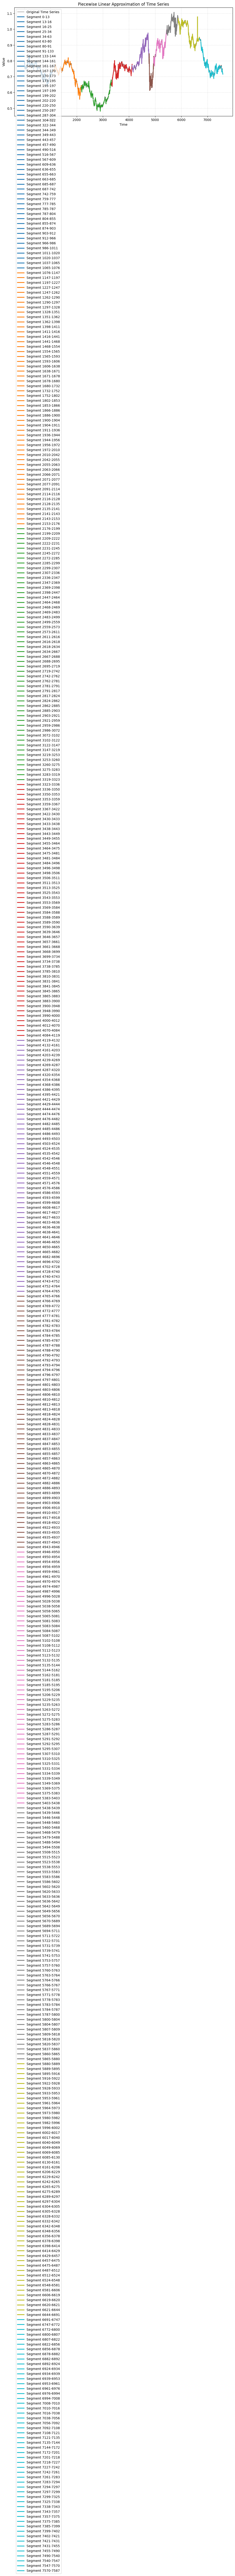

In [11]:
plot_time_series_with_segments(X, Y, alphas, X_ranges)

In [5]:

for i, (a, (start, end)) in enumerate(zip(alphas, X_ranges)):
    print(f"Segment {i+1}: X[{start}:{end}]  angle={a:.3f}")

Segment 1: X[0:3421]  angle=-0.003
Segment 2: X[3421:4783]  angle=0.004
Segment 3: X[4783:6279]  angle=0.015
Segment 4: X[6279:7093]  angle=-0.008
Segment 5: X[7093:7587]  angle=0.003
